In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
fake_data = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')
real_data = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')

fake_data['label']=0
real_data['label']=1

In [3]:
data = pd.concat([fake_data,real_data], axis=0)
data = data.sample(frac = 1).reset_index(drop=True)
data.label.value_counts()

label
0    23481
1    21417
Name: count, dtype: int64

In [4]:
data

,title,text,subject,date,label
0,Boston mayor says not subject of federal probe...,"BOSTON (Reuters) - Boston Mayor Martin Walsh, ...",politicsNews,"April 25, 2016",1
1,How Egypt's changing culture led one emigre to...,"(In this February 20 story, corrects in secon...",politicsNews,"February 20, 2016",1
2,U.S. House Democrats launch probe into MS drug...,NEW YORK (Reuters) - U.S. House Democrats said...,politicsNews,"August 17, 2017",1
3,LAWLESS FEDS REFUSE To Hand Over Communication...,"Oh, this is so ridiculous and so bogus that th...",Government News,"Oct 29, 2015",0
4,CONSERVATIVE Has Message For “DREAMERS” Scream...,"Remember when illegal aliens, students, and re...",politics,"Sep 7, 2017",0
...,...,...,...,...,...
44893,Russia says U.S. actions towards its consulate...,"XIAMEN, China (Reuters) - Russian Deputy Forei...",politicsNews,"September 4, 2017",1
44894,Trump says Britain should leave EU: newspaper ...,LONDON (Reuters) - Donald Trump told Britons o...,politicsNews,"June 19, 2016",1
44895,House Speaker visits White House ahead of heal...,WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"March 24, 2017",1
44896,YOU CAN THANK OBAMA FOR THIS: Black Woman Spit...,You can blame Obama for the hatred and divisio...,politics,"Apr 12, 2016",0


In [5]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /usr/share/nltk_data...
[nltk_data]    | Downloading pa

True

In [6]:
import string 
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    words = list(set([word for word in words if len(word) > 2]))
    return ' '.join(words)

In [7]:
data['clean_text']=data['text'].apply(preprocess_text)
data

,title,text,subject,date,label,clean_text
0,Boston mayor says not subject of federal probe...,"BOSTON (Reuters) - Boston Mayor Martin Walsh, ...",politicsNews,"April 25, 2016",1,point concerned tactics media led officials ha...
1,How Egypt's changing culture led one emigre to...,"(In this February 20 story, corrects in secon...",politicsNews,"February 20, 2016",1,mosque midlength elhamy thing muslims evening ...
2,U.S. House Democrats launch probe into MS drug...,NEW YORK (Reuters) - U.S. House Democrats said...,politicsNews,"August 17, 2017",1,treatments 600 average letters committee previ...
3,LAWLESS FEDS REFUSE To Hand Over Communication...,"Oh, this is so ridiculous and so bogus that th...",Government News,"Oct 29, 2015",0,data 15year researchers secretive burning comm...
4,CONSERVATIVE Has Message For “DREAMERS” Scream...,"Remember when illegal aliens, students, and re...",politics,"Sep 7, 2017",0,chanting shouts advance bbusa617 president bel...
...,...,...,...,...,...,...
44893,Russia says U.S. actions towards its consulate...,"XIAMEN, China (Reuters) - Russian Deputy Forei...",politicsNews,"September 4, 2017",1,states washington’s reporters sergei xiamen un...
44894,Trump says Britain should leave EU: newspaper ...,LONDON (Reuters) - Donald Trump told Britons o...,politicsNews,"June 19, 2016",1,muslims britons although president elected pre...
44895,House Speaker visits White House ahead of heal...,WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"March 24, 2017",1,paul obamacare made donald fate repeal hill ai...
44896,YOU CAN THANK OBAMA FOR THIS: Black Woman Spit...,You can blame Obama for the hatred and divisio...,politics,"Apr 12, 2016",0,obama pot stirring video baiting division year...


# Creating WordCloud

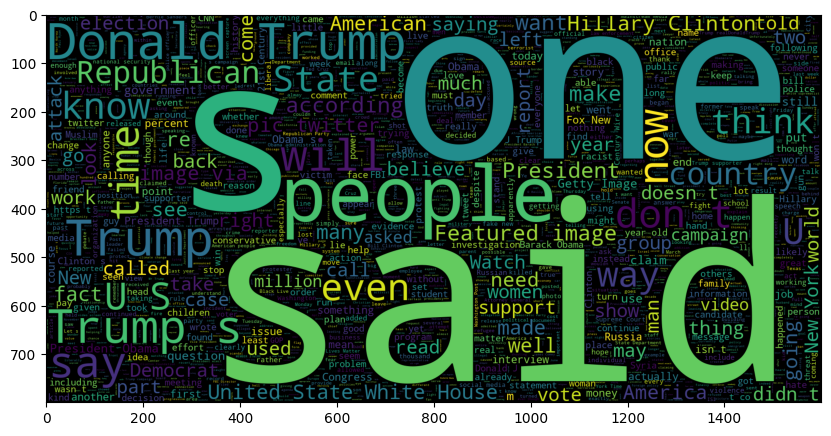

In [8]:
import pandas as pd
from wordcloud import WordCloud

wc = WordCloud(max_words=2000, width=1600, height=800).generate(" ".join(data[data.label==0].text))# Display the word cloud.
plt.figure(figsize=(10, 10))
plt.imshow(wc)
plt.show()

In [9]:
data.label.value_counts()

label
0    23481
1    21417
Name: count, dtype: int64

In [21]:
data.head(5)

,title,text,subject,date,label,clean_text
0,Boston mayor says not subject of federal probe...,"BOSTON (Reuters) - Boston Mayor Martin Walsh, ...",politicsNews,"April 25, 2016",1,point concerned tactics media led officials ha...
1,How Egypt's changing culture led one emigre to...,"(In this February 20 story, corrects in secon...",politicsNews,"February 20, 2016",1,mosque midlength elhamy thing muslims evening ...
2,U.S. House Democrats launch probe into MS drug...,NEW YORK (Reuters) - U.S. House Democrats said...,politicsNews,"August 17, 2017",1,treatments 600 average letters committee previ...
3,LAWLESS FEDS REFUSE To Hand Over Communication...,"Oh, this is so ridiculous and so bogus that th...",Government News,"Oct 29, 2015",0,data 15year researchers secretive burning comm...
4,CONSERVATIVE Has Message For “DREAMERS” Scream...,"Remember when illegal aliens, students, and re...",politics,"Sep 7, 2017",0,chanting shouts advance bbusa617 president bel...


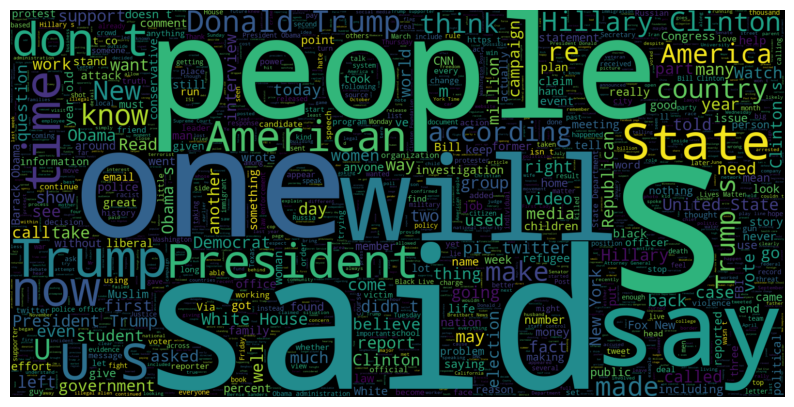

In [23]:
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib for plotting
from wordcloud import WordCloud

# Assuming you have a DataFrame 'data' with columns 'label', 'subject', and 'text'
filtered_data = data[(data.label == 0) & (data.subject == 'politics')]

# Generate the word cloud
wc = WordCloud(max_words=2000, width=1600, height=800).generate(" ".join(filtered_data['text']))

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')  # Use interpolation for smoother rendering
plt.axis("off")  # Turn off the axis
plt.show()


# Splitting our data to test and train

In [25]:
X = data.clean_text
y = data.label

In [27]:
X.head(5), y.head(5)

(0    point concerned tactics media led officials ha...
 1    mosque midlength elhamy thing muslims evening ...
 2    treatments 600 average letters committee previ...
 3    data 15year researchers secretive burning comm...
 4    chanting shouts advance bbusa617 president bel...
 Name: clean_text, dtype: object,
 0    1
 1    1
 2    1
 3    0
 4    0
 Name: label, dtype: int64)

In [28]:
len(X),len(y)

(44898, 44898)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [31]:
len(X_train),len(y_train)

(35918, 35918)

In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer 
tokenizer = Tokenizer()

tokenizer.fit_on_texts(X_train)

train_token = tokenizer.texts_to_sequences(X_train)
test_token = tokenizer.texts_to_sequences(X_test)


In [36]:
# train_token

In [37]:
# Get the total number of tokens
total_tokens = len(tokenizer.word_index)
print("Total tokens:", total_tokens)

Total tokens: 218180


In [41]:
# Assuming you have a list of tokenized sequences named 'tokenized_data'


# Initialize a variable to store the maximum sequence length
max_sequence_length = 0

# Iterate through the tokenized sequences and find the maximum length
for sequence in train_token:
    sequence_length = len(sequence)
    if sequence_length > max_sequence_length:
        max_sequence_length = sequence_length

print("Maximum sequence length:", max_sequence_length)


Maximum sequence length: 2365


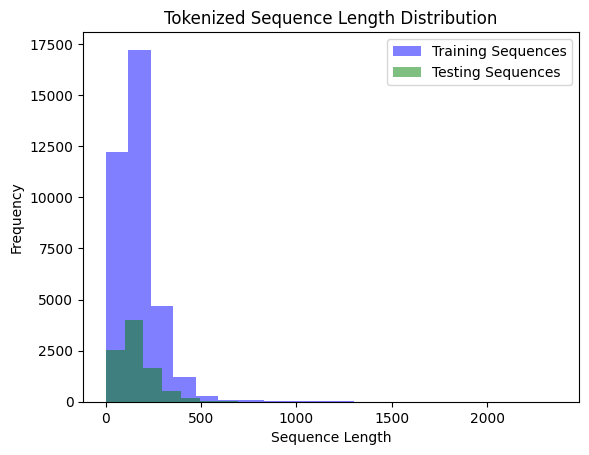

In [38]:
train_sequence_lengths = [len(seq) for seq in train_token]
test_sequence_lengths = [len(seq) for seq in test_token]

plt.hist(train_sequence_lengths, bins=20, label='Training Sequences', alpha=0.5, color='blue')

# Create a histogram plot for testing sequence lengths
plt.hist(test_sequence_lengths, bins=20, label='Testing Sequences', alpha=0.5, color='green')

# Add labels and a legend
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.title('Tokenized Sequence Length Distribution')
plt.show()

# Model Training 

In [44]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 20

# Apply post-padding to sequences
train_sequences = pad_sequences(train_token, maxlen=maxlen, padding='post')
test_sequences = pad_sequences(test_token, maxlen=maxlen, padding='post')

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense

In [46]:
model = Sequential([
    Embedding(input_dim=total_tokens+1, output_dim=4, input_length=20),
    SimpleRNN(32, return_sequences=True),
    SimpleRNN(32, return_sequences=True),
    SimpleRNN(32),
    Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=[tf.keras.metrics.AUC()])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 4)             872724    
                                                                 
 simple_rnn (SimpleRNN)      (None, 20, 32)            1184      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 20, 32)            2080      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 878,101
Trainable params: 878,101
Non-trainable params: 0
_________________________________________________________________


The calculation of the number of parameters in the embedding layer is as folllowed :
218180 * 4 + 4

For the first simple rnn layer it is :
32 * 32 + 32 * 4 + 32

In [56]:
y_train=y_train.astype(int)
y_test=y_test.astype(int)

In [58]:
history = model.fit(train_sequences, y_train, epochs=20, validation_data=(test_sequences, y_test))

Epoch 1/20
1123/1123 [==============================] - 101s 85ms/step - loss: 0.2356 - auc: 0.9659 - val_loss: 0.1328 - val_auc: 0.9894
Epoch 2/20
1123/1123 [==============================] - 79s 70ms/step - loss: 0.0803 - auc: 0.9953 - val_loss: 0.1444 - val_auc: 0.9884
Epoch 3/20
1123/1123 [==============================] - 78s 69ms/step - loss: 0.0428 - auc: 0.9981 - val_loss: 0.1797 - val_auc: 0.9859
Epoch 4/20
1123/1123 [==============================] - 77s 69ms/step - loss: 0.0262 - auc: 0.9991 - val_loss: 0.1488 - val_auc: 0.9871
Epoch 5/20
1123/1123 [==============================] - 77s 69ms/step - loss: 0.0172 - auc: 0.9995 - val_loss: 0.1716 - val_auc: 0.9836
Epoch 6/20
1123/1123 [==============================] - 76s 68ms/step - loss: 0.0151 - auc: 0.9995 - val_loss: 0.1902 - val_auc: 0.9816
Epoch 7/20
1123/1123 [==============================] - 76s 68ms/step - loss: 0.0104 - auc: 0.9998 - val_loss: 0.2026 - val_auc: 0.9796
Epoch 8/20
1123/1123 [=========================

# Calculating the log_loss, roc auc score and confusion matrix

In [62]:
from sklearn.metrics import log_loss, roc_auc_score, confusion_matrix

train_preds = model.predict(train_sequences)
test_preds = model.predict(test_sequences)

print("Train Log Loss:", log_loss(y_train, train_preds))

print("Test Log Loss:", log_loss(y_test, test_preds))

print("Train ROC-AUC Score:", roc_auc_score(y_train, train_preds))
print("Test ROC-AUC Score:", roc_auc_score(y_test, test_preds))

print("Train Confusion Matrix:")
print(confusion_matrix(y_train, (train_preds > 0.5).astype(int)))

print("Test Confusion Matrix:")
print(confusion_matrix(y_test, (test_preds > 0.5).astype(int)))

281/281 [==============================] - 2s 7ms/step
Train Log Loss: 0.006111827337156402
Test Log Loss: 0.3011129231412707
Train ROC-AUC Score: 0.999975147863454
Test ROC-AUC Score: 0.9816988118353698
Train Confusion Matrix:
[[18797     0]
 [   67 17054]]
Test Confusion Matrix:
[[4528  156]
 [ 308 3988]]
